# Preprocessing

In [28]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

%reload_ext autoreload
%autoreload 2

from utils import plot_bar, calculate_plot_bar

In [29]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')

In [30]:
data.head()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
0,0,5,0,10,0.0,154,400,100,330,74,...,12.075999,28.488169,46.644520,26.383057,36.577200,29.639097,35.086117,0,0,2
1,1,1,0,186,100.0,126,551,100,325,216,...,36.107468,35.687850,26.218090,44.915104,46.223600,40.441845,51.488040,1,0,2
2,0,1,0,8,0.0,352,858,120,133,36,...,26.887451,21.217016,31.033924,42.134968,35.761204,19.461880,54.055370,0,0,2
3,0,15,0,154,0.0,265,562,196,301,121,...,23.337696,34.052437,37.773370,19.431648,40.459793,38.908910,27.049220,1,0,3
4,1,15,1,112,0.0,235,1110,181,515,138,...,14.724202,26.321451,33.011460,67.642975,55.393745,55.883717,64.675940,2,0,3


In [31]:
data.describe()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,2.090967,6.300093,0.956138,295.091181,31.676114,318.119289,1252.352934,220.651269,512.735847,147.040034,...,20.335323,29.814609,28.210611,34.711652,33.738777,33.705974,34.698521,0.632669,0.626666,14.749960
std,1.579105,3.109130,1.064952,155.829024,38.585542,84.346060,528.922132,172.186030,198.128515,76.170873,...,6.163095,4.665470,6.083261,7.945853,6.709148,6.054861,7.256317,0.968222,0.879370,4.551041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.221877,0.072354,0.217817,0.291715,0.000000,0.000000,1.000000
25%,1.000000,4.000000,0.000000,182.000000,0.000000,260.000000,886.000000,98.000000,383.000000,95.000000,...,16.298605,26.976264,24.289200,29.570912,29.432397,29.950629,30.057923,0.000000,0.000000,11.000000
50%,2.000000,6.000000,1.000000,278.000000,20.000000,325.000000,1254.000000,193.000000,502.000000,138.000000,...,20.142790,29.902534,28.047293,34.257595,33.475227,33.466953,34.267536,0.000000,0.000000,15.000000
75%,3.000000,8.000000,2.000000,389.000000,50.000000,379.000000,1595.000000,315.000000,628.000000,190.000000,...,24.163904,32.814936,31.953294,39.251503,37.717817,37.139702,38.763768,1.000000,1.000000,19.000000
max,18.000000,39.000000,11.000000,2129.000000,500.000000,816.000000,6521.000000,1907.000000,3276.000000,1189.000000,...,84.804730,82.140510,100.000000,114.739630,151.785720,126.785710,117.857150,43.000000,29.000000,22.000000


## Normal preprocess

In [35]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')

In [36]:
X_features = list(set(data.columns) - {'tier'})
percents = ['percent_boost_speed', 'percent_supersonic_speed', 'percent_low_air', 'percent_high_air',
            'percent_boost_0_25', 'percent_boost_25_50', 'percent_boost_50_75', 'percent_full_boost', 'percent_zero_boost',
            'percent_farthest_from_ball', 'percent_closest_to_ball', 'percent_most_forward', 'percent_most_back', 'percent_infront_ball',
            'percent_neutral_third', 'percent_offensive_third']
remaining = list(set(X_features) - set(percents))
print(remaining)

['amount_collected_small', 'amount_used_while_supersonic', 'count_powerslide', 'amount_overfill_stolen', 'taken', 'avg_distance_to_ball_possession', 'amount_stolen_small', 'bpm', 'saves', 'shooting_percentage', 'amount_stolen_big', 'avg_distance_to_mates', 'score', 'shots_against', 'amount_overfill', 'avg_distance_to_ball_no_possession', 'avg_powerslide_duration', 'inflicted', 'amount_collected_big', 'shots']


In [37]:
data_preprocessed = data.copy()

data_preprocessed[percents] /= 100

data_preprocessed[remaining] = RobustScaler().fit_transform(data_preprocessed[remaining])
data_preprocessed.describe()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,0.045483,0.075023,-0.021931,0.082566,0.233522,-0.057821,-0.002323,0.127425,0.043820,0.095158,...,0.203353,0.298146,0.282106,0.347117,0.337388,0.337060,0.346985,0.632669,0.626666,14.749960
std,0.789552,0.777282,0.532476,0.752797,0.771711,0.708790,0.746011,0.793484,0.808688,0.801799,...,0.061631,0.046655,0.060833,0.079459,0.067091,0.060549,0.072563,0.968222,0.879370,4.551041
min,-1.000000,-1.500000,-0.500000,-1.342995,-0.400000,-2.731092,-1.768688,-0.889401,-2.048980,-1.452632,...,0.000000,0.000000,0.000000,0.002219,0.000724,0.002178,0.002917,0.000000,0.000000,1.000000
25%,-0.500000,-0.500000,-0.500000,-0.463768,-0.400000,-0.546218,-0.519041,-0.437788,-0.485714,-0.452632,...,0.162986,0.269763,0.242892,0.295709,0.294324,0.299506,0.300579,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.201428,0.299025,0.280473,0.342576,0.334752,0.334670,0.342675,0.000000,0.000000,15.000000
75%,0.500000,0.500000,0.500000,0.536232,0.600000,0.453782,0.480959,0.562212,0.514286,0.547368,...,0.241639,0.328149,0.319533,0.392515,0.377178,0.371397,0.387638,1.000000,1.000000,19.000000
max,8.000000,8.250000,5.000000,8.942029,9.600000,4.126050,7.428773,7.898618,11.322449,11.063158,...,0.848047,0.821405,1.000000,1.147396,1.517857,1.267857,1.178572,43.000000,29.000000,22.000000


In [38]:
data_preprocessed.to_csv('../data/preprocessed/dataset_normal_preprocessed.csv', index=None)

## Factor Analysis

In [39]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

In [40]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')
y = data.drop('tier', axis=1, inplace=True)

In [41]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(7926215.222886042, 0.0)

In [42]:
kmo_all, kmo_model = calculate_kmo(data)
kmo_model

0.7350361358348878

In [43]:
fa = FactorAnalyzer(n_factors=data.shape[1], rotation=None)
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.66168999, 4.08644897, 2.83432441, 2.28558437, 1.84343317,
       1.7371591 , 1.68384878, 1.22659406, 1.0839006 , 0.9532351 ,
       0.93196593, 0.84942509, 0.81297165, 0.76319104, 0.71516273,
       0.69252737, 0.6741302 , 0.64726297, 0.62468648, 0.5875707 ,
       0.55865857, 0.47723509, 0.41265987, 0.36922481, 0.35178791,
       0.31810623, 0.31006858, 0.28431297, 0.24621891, 0.21714735,
       0.18559563, 0.15784588, 0.12932119, 0.12073377, 0.08820541,
       0.07776513])

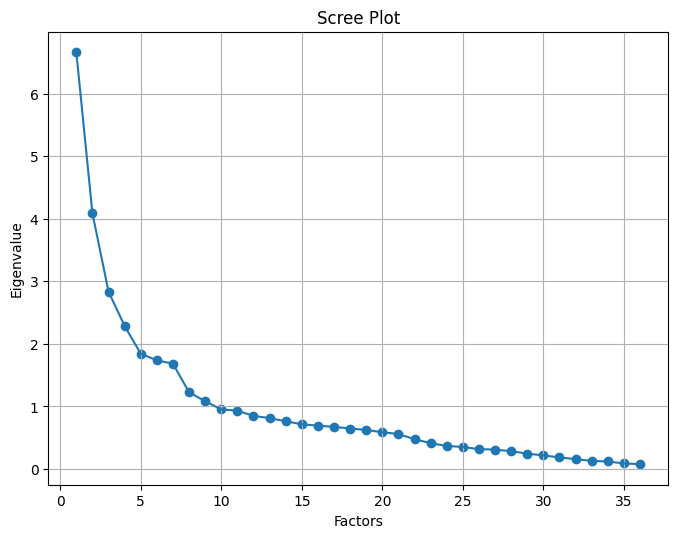

In [44]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig("../docs/res/imgs/scree.pdf", format='pdf')
plt.show()

9 eigen values above 1

In [45]:
fa = FactorAnalyzer(n_factors=10, rotation="varimax")
fa.fit(data)

FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})

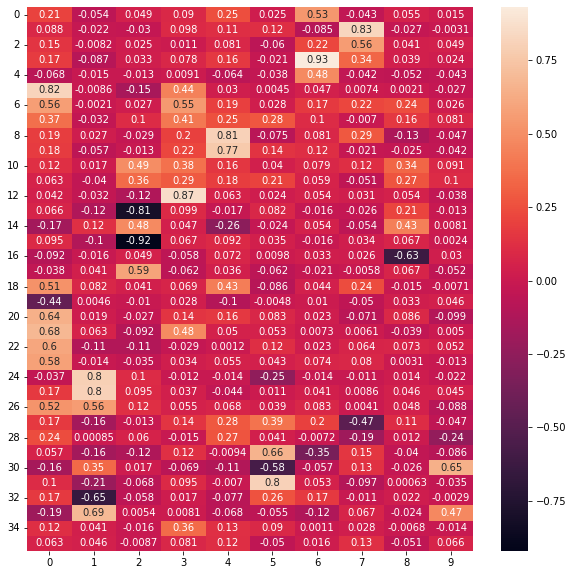

In [46]:
ax = sns.heatmap(fa.loadings_, annot=True)
ax.figure.set_size_inches(10, 10)

In [49]:
from IPython.display import display, HTML
series = []
with pd.option_context('expand_frame_repr', False):
    for index, row in pd.DataFrame(fa.loadings_.T, columns=data.columns).iterrows():
        serie = row[row.abs() > 0.4].sort_values().to_frame().T
        html = HTML(serie.style.to_html())
        display(html)
        series.append(serie)
        
# top = """
# <!DOCTYPE html>
# <html>
# <head>
#   <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css/bootstrap.min.css">
# </head>
# <body>
# """
        
# bottom = """
# <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css/bootstrap.min.css">

# </body>
# </html>
# """
# with open('factors.html', 'w') as f:
#     f.write(top)
#     for html in htmls:
#         # html_data, metadata = get_ipython().display_formatter.format(html)
#         f.write(html.data) 

,avg_powerslide_duration,count_powerslide,avg_distance_to_mates,amount_collected_big,percent_high_air,percent_low_air,percent_boost_speed,percent_supersonic_speed,bpm
0,-0.440787,0.514730,0.523350,0.562883,0.580444,0.601562,0.644030,0.678014,0.819185


,percent_closest_to_ball,avg_distance_to_mates,percent_farthest_from_ball,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession
1,-0.645806,0.555456,0.687153,0.796498,0.801328


,percent_boost_0_25,percent_zero_boost,percent_full_boost,amount_overfill,percent_boost_50_75
2,-0.919832,-0.806868,0.477101,0.490977,0.586802


,amount_stolen_big,bpm,percent_supersonic_speed,amount_collected_big,amount_used_while_supersonic
3,0.409381,0.441059,0.478508,0.546174,0.865338


,count_powerslide,amount_stolen_small,amount_collected_small
4,0.426984,0.770840,0.806642


,percent_most_back,percent_infront_ball,percent_most_forward
5,-0.578020,0.656878,0.800814


,shooting_percentage,shots,score
6,0.476040,0.534223,0.930912


,percent_offensive_third,saves,shots_against
7,-0.473084,0.555912,0.827712


,percent_boost_25_50,percent_full_boost
8,-0.628995,0.432280


,percent_farthest_from_ball,percent_most_back
9,0.471374,0.647720


In [50]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4,5,6,7,8,9
0,3.914568,2.782415,2.579874,2.218878,2.041205,1.917714,1.743628,1.671551,0.971766,0.779274
1,0.108738,0.077289,0.071663,0.061635,0.056700,0.053270,0.048434,0.046432,0.026993,0.021647
2,0.108738,0.186027,0.257690,0.319326,0.376026,0.429296,0.477730,0.524162,0.551156,0.572802


In [51]:
data_factored = pd.DataFrame(fa.transform(data))

In [52]:
data_factored

,0,1,2,3,4,5,6,7,8,9
0,-2.480462,-1.401805,-6.908076,-0.963469,0.065268,0.952558,-1.882261,0.120513,3.663850,-0.217494
1,-2.627586,-0.047735,-1.653174,-0.109637,0.764066,1.156853,-0.053796,-2.024641,1.180573,2.214310
2,-0.103643,2.578124,-0.774931,0.590553,-1.484491,0.728479,-1.007942,-1.670316,-0.243349,1.136392
3,-2.000263,-1.200815,-2.885654,0.978180,-0.866215,1.529654,0.084128,1.445739,-0.459301,-1.659585
4,-1.103113,-0.764782,0.026533,0.231077,-0.263991,1.653065,-1.805031,1.673394,-1.276308,6.103619
...,...,...,...,...,...,...,...,...,...,...
404946,-2.175278,0.339883,-0.764466,0.407802,0.088137,-0.213979,-0.181675,0.193854,-0.462980,0.082116
404947,-1.437361,-0.293580,-1.100824,-0.886141,0.583519,0.643788,-0.503961,0.348746,0.104536,-1.261440
404948,-2.427251,0.160348,-1.691461,0.953683,-0.373237,-0.705571,0.915202,-0.681719,-1.187375,-0.311622
404949,-1.429157,-0.679893,1.375739,-0.693518,-1.280522,0.314091,0.827116,-0.473894,0.641187,-1.487850


In [53]:
data_factored['tier'] = pd.read_csv('../data/preprocessed/dataset_selected.csv')['tier']
data_factored.to_csv('../data/preprocessed/dataset_factored.csv', index=None)